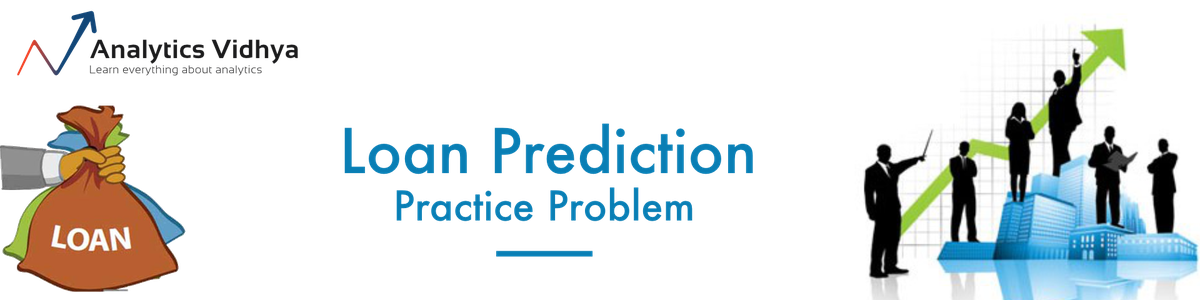

# Predict Loan Eligibility for Dream Housing Finance company

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

Please refere [here](https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/#ProblemStatement) for more information

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC, LinearSVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop

from visualize import plot_counts

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_csv('D:/Machine Data/DataHack/Loan Prediction/train_ctrUa4K.csv')
df_test = pd.read_csv('D:/Machine Data/DataHack/Loan Prediction/test_lAUu6dG.csv')

In [3]:
train_len = len(df_train)
test_len = len(df_test)

In [4]:
def get_train_df():
    return df[:train_len]

def get_test_df():
    return df[-test_len:]

In [5]:
df = pd.concat([df_train, df_test], axis=0)

In [6]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN
363,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN
364,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN
365,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN


# EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [9]:
df.isna().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [10]:
df.nunique()

Loan_ID              981
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      752
CoapplicantIncome    437
LoanAmount           232
Loan_Amount_Term      12
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [11]:
cols = list(df.columns[1:6]) + list(df.columns[-4:-1])

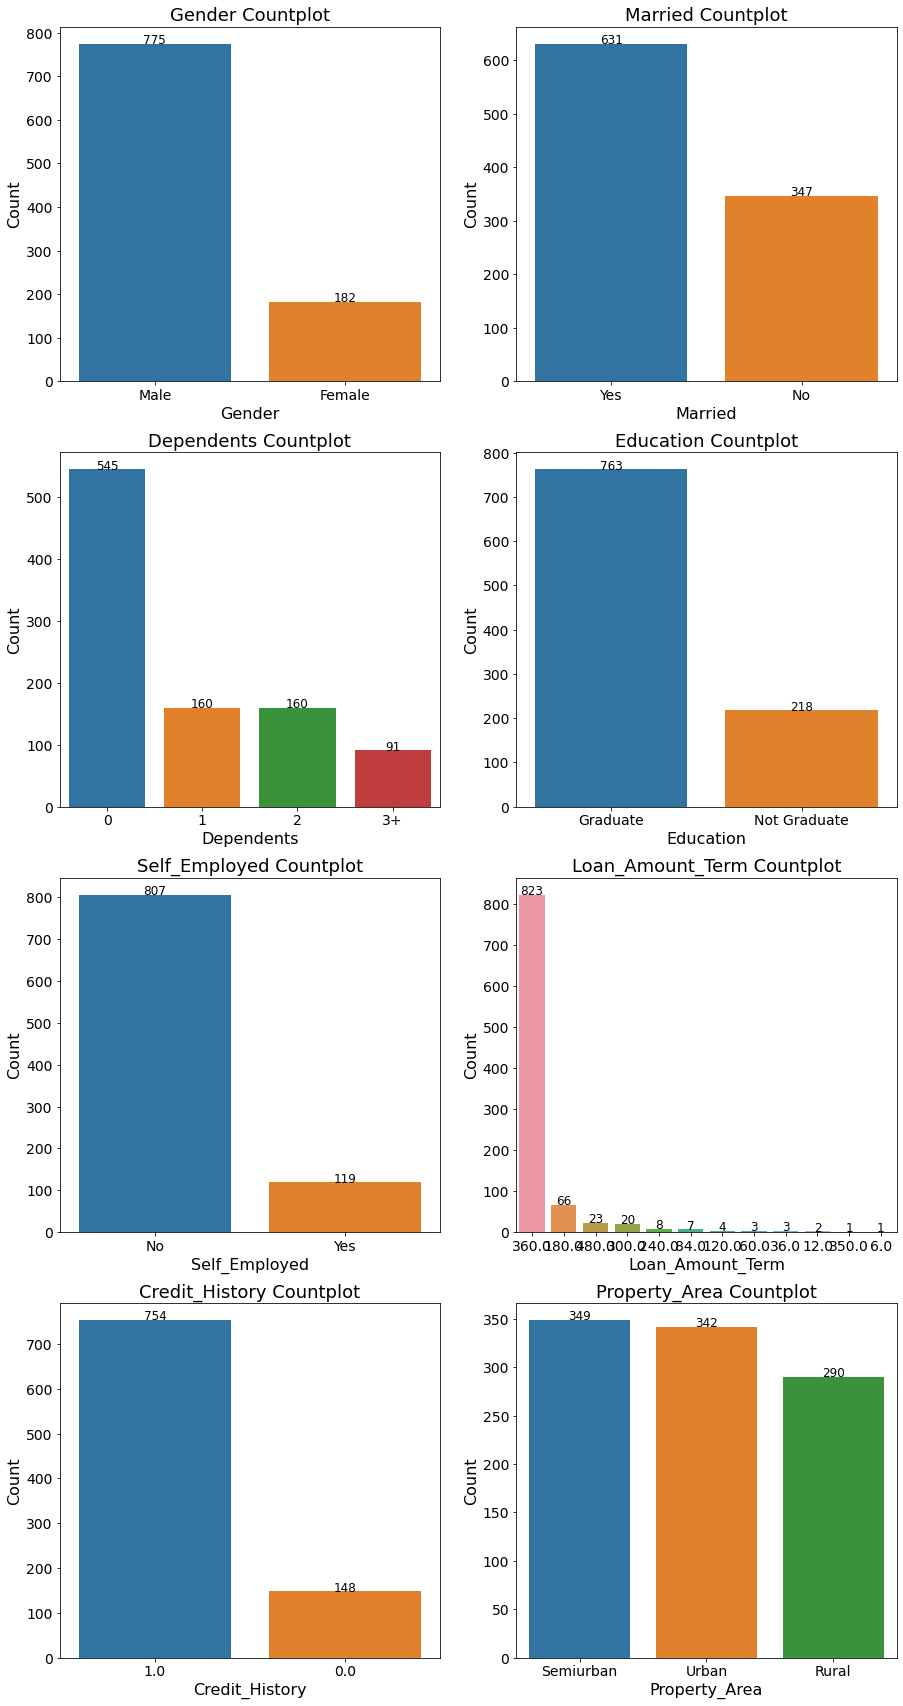

In [12]:
plot_counts((15,30), df, cols, 42, 0, 'Loan_Status')

Text(0.5, 1.0, 'CoapplicantIncome')

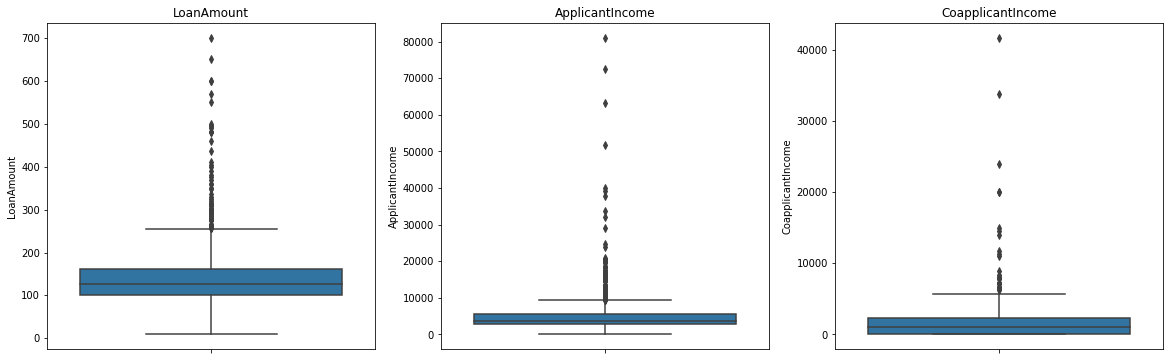

In [13]:
fig = plt.figure(figsize=(20, 6))

ax = fig.add_subplot(1,3,1)
sns.boxplot(data=df, y="LoanAmount", ax=ax)
plt.title('LoanAmount')

ax = fig.add_subplot(1,3,2)
sns.boxplot(data=df, y="ApplicantIncome", ax=ax)
plt.title('ApplicantIncome')

ax = fig.add_subplot(1,3,3)
sns.boxplot(data=df, y="CoapplicantIncome", ax=ax)
plt.title('CoapplicantIncome')

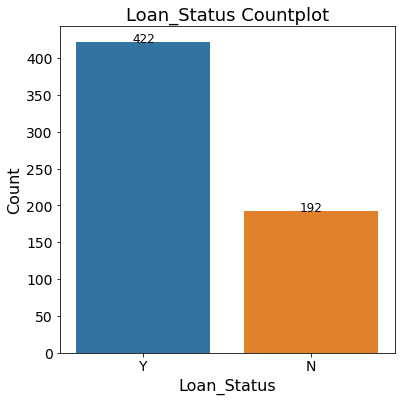

In [14]:
plot_counts((6,6), df, ['Loan_Status'], 11, 0)

As we can observe, they are right skewed and contains a lot of outliers

# Preprocessing

## Processing Nulls

##### For Neumarical variables, we will replace nulls with the mean

In [15]:
mean = df['LoanAmount'].mean()
df['LoanAmount'].fillna(mean, inplace=True)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,142.51153,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.00000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.00000,360.0,1.0,Urban,Y


##### For our Categorical features we are going to replace nulls with mode (the most frequent category in the column)

In [16]:
mode = df['Gender'].mode()[0]
df['Gender'].fillna(mode, inplace=True)

In [17]:
mode = df['Married'].mode()[0]
df['Married'].fillna(mode, inplace=True)

In [18]:
mode = df['Dependents'].mode()[0]
df['Dependents'].fillna(mode, inplace=True)

In [19]:
mode = df['Self_Employed'].mode()[0]
df['Self_Employed'].fillna(mode, inplace=True)

In [20]:
mode = df['Loan_Amount_Term'].mode()[0]
df['Loan_Amount_Term'].fillna(mode, inplace=True)

In [21]:
mode = df['Credit_History'].mode()[0]
df['Credit_History'].fillna(mode, inplace=True)

In [22]:
df.isna().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

Note: the `Loan_Status` Nulls because they are the test set

In [23]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,142.51153,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.00000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.00000,360.0,1.0,Urban,Y


## Encoding Features

##### For `Gender`, `Married`, `Education`, and `Self_Employed` we are going to use `LabelEncoder` to binarize them

In [24]:
le = LabelEncoder()

In [25]:
df['Gender'] = le.fit_transform(df['Gender'])
le.classes_

array(['Female', 'Male'], dtype=object)

In [26]:
df['Married'] = le.fit_transform(df['Married'])
le.classes_

array(['No', 'Yes'], dtype=object)

In [27]:
df['Education'] = le.fit_transform(df['Education'])
le.classes_

array(['Graduate', 'Not Graduate'], dtype=object)

In [28]:
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
le.classes_

array(['No', 'Yes'], dtype=object)

##### We are going to define another label encoder for our target variable because we are goingto inverse transformation in the end

In [29]:
target_encoder = LabelEncoder()

In [30]:
df['Loan_Status'][:train_len] = target_encoder.fit_transform(get_train_df()['Loan_Status'])
target_encoder.classes_

array(['N', 'Y'], dtype=object)

##### For dependents we are going to use `LabelEncoder` also since it can order the feature

In [31]:
df['Dependents'] = le.fit_transform(df['Dependents'])
le.classes_

array(['0', '1', '2', '3+'], dtype=object)

##### For `Loan_Amount_Term` and `Property_Area` we are going to one-hot encode them since they are nominal

In [32]:
df = pd.get_dummies(df, columns=['Property_Area', 'Loan_Amount_Term'])

In [33]:
# rearrangin the columns such that the `Loan_Status` column is the last one

loan_status = df.pop('Loan_Status')
df.insert(len(df.columns), 'Loan_Status', loan_status)

##### As we observed for our continious/nuemrical variables, they are skewed and have a lot of outliers, a common approach is to take the log transformation for them to eliminate the skewness and reduce outliers

In [34]:
df['ApplicantIncome'] = np.log(df['ApplicantIncome'])
df['CoapplicantIncome'] = np.log(df['ApplicantIncome'])
df['LoanAmount'] = np.log(df['LoanAmount'])

In [35]:
df['ApplicantIncome'].replace(-np.Inf, 0, inplace=True)
df['CoapplicantIncome'].replace(-np.Inf, 0, inplace=True)
df['CoapplicantIncome'].fillna(0, inplace=True)

### Preparing Data

In [36]:
train = get_train_df()
train['Loan_Status'] = train['Loan_Status'].astype('int64') 
X = train.drop(columns=['Loan_ID', 'Loan_Status'])
y = train['Loan_Status']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=y)

In [38]:
# scaling our data
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# Model Building & Evaluation

### 1. Logistic Regression

In [39]:
lr_parameters = { 
    'penalty': ['l1', 'l2', 'elasticnet'],          
    'C':[0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear']
    }

lr = LogisticRegression()

In [40]:
grid_lr = GridSearchCV(lr, lr_parameters)

In [41]:
grid_lr.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear']})

In [42]:
best = grid_lr.best_estimator_

In [43]:
accuracy_score(y_test, best.predict(X_test_s))

0.7727272727272727

### 2. RandomForest

In [44]:
tree = RandomForestClassifier(n_estimators=200, n_jobs=-1)

In [45]:
tree.fit(X_train_s, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1)

In [46]:
predicted = tree.predict(X_test_s)

In [47]:
accuracy_score(y_test, predicted)

0.7857142857142857

### 3. Boosing

In [48]:
from xgboost import XGBClassifier

In [49]:
booster = XGBClassifier(n_estimators=100,
                        max_leaves=1000, 
                        max_depth=10,
                        learning_rate=0.01,
                        n_jobs=-1,
                       )

In [50]:
booster.fit(X_train_s, y_train, eval_set=[(X_test_s, y_test)])

[0]	validation_0-logloss:0.68979
[1]	validation_0-logloss:0.68645
[2]	validation_0-logloss:0.68314
[3]	validation_0-logloss:0.68000
[4]	validation_0-logloss:0.67687
[5]	validation_0-logloss:0.67387
[6]	validation_0-logloss:0.67098
[7]	validation_0-logloss:0.66778
[8]	validation_0-logloss:0.66491
[9]	validation_0-logloss:0.66188
[10]	validation_0-logloss:0.65913
[11]	validation_0-logloss:0.65647
[12]	validation_0-logloss:0.65345
[13]	validation_0-logloss:0.65100
[14]	validation_0-logloss:0.64809
[15]	validation_0-logloss:0.64566
[16]	validation_0-logloss:0.64323
[17]	validation_0-logloss:0.64050
[18]	validation_0-logloss:0.63832
[19]	validation_0-logloss:0.63604
[20]	validation_0-logloss:0.63329
[21]	validation_0-logloss:0.63082
[22]	validation_0-logloss:0.62868
[23]	validation_0-logloss:0.62600
[24]	validation_0-logloss:0.62379
[25]	validation_0-logloss:0.62158
[26]	validation_0-logloss:0.61900
[27]	validation_0-logloss:0.61683
[28]	validation_0-logloss:0.61434
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=1000,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1, ...)

In [51]:
predicted = booster.predict(X_test_s)

In [52]:
accuracy_score(y_test, predicted)

0.7467532467532467

### 4. Neural Networks

In [53]:
EPOCHS=25
BATCH_SIZE=8
LR=0.001

In [54]:
input_shape = (X_train.shape[1],)
input_shape

(24,)

In [55]:
model = Sequential()

In [56]:
model.add(Dense(64, activation='relu',input_shape=input_shape))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1600      
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 16)                5

In [58]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=Adam(lr=LR))

In [59]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/25
58/58 [==============================] - 1s 7ms/step - loss: 0.6526 - accuracy: 0.6957 - val_loss: 0.6554 - val_accuracy: 0.6494
Epoch 2/25
58/58 [==============================] - 0s 3ms/step - loss: 0.6025 - accuracy: 0.7000 - val_loss: 0.6460 - val_accuracy: 0.6494
Epoch 3/25
58/58 [==============================] - 0s 2ms/step - loss: 0.5984 - accuracy: 0.7000 - val_loss: 0.6395 - val_accuracy: 0.6494
Epoch 4/25
58/58 [==============================] - 0s 2ms/step - loss: 0.5623 - accuracy: 0.7000 - val_loss: 0.6148 - val_accuracy: 0.6494
Epoch 5/25
58/58 [==============================] - 0s 2ms/step - loss: 0.5197 - accuracy: 0.7000 - val_loss: 0.6448 - val_accuracy: 0.6494
Epoch 6/25
58/58 [==============================] - 0s 2ms/step - loss: 0.5279 - accuracy: 0.7217 - val_loss: 0.6450 - val_accuracy: 0.7143
Epoch 7/25
58/58 [==============================] - 0s 3ms/step - loss: 0.5312 - accuracy: 0.7478 - val_loss: 0.6353 - val_accuracy: 0.7468
Epoch 8/25
58/58 [==

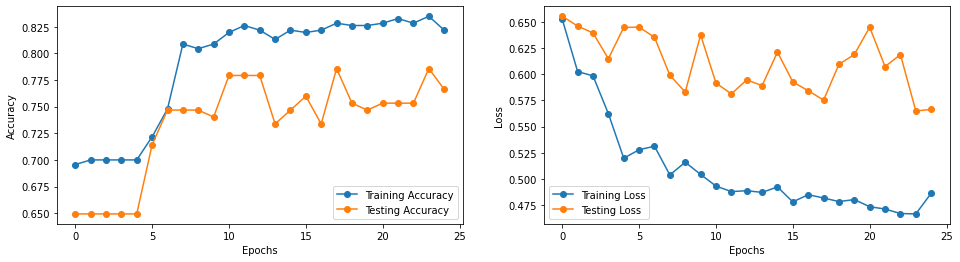

In [60]:
fig = plt.figure(figsize=(16,4))

ax = fig.add_subplot(1,2,1)
ax.plot(hist.history['accuracy'], marker='o',label='Training Accuracy')
ax.plot(hist.history['val_accuracy'], marker='o',label='Testing Accuracy')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.legend()

ax = fig.add_subplot(1,2,2)
ax.plot(hist.history['loss'], marker='o',label='Training Loss')
ax.plot(hist.history['val_loss'], marker='o',label='Testing Loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()

# Inferencing

#### We are going to use `RandomForest Classifier` to predict our test data

In [61]:
train = get_train_df()
test = get_test_df()

In [62]:
X_train, y_train = np.array(train.drop(columns=['Loan_ID', 'Loan_Status'])), np.array(train['Loan_Status'].astype('int64'))
X_test = np.array(test.drop(columns=['Loan_ID', 'Loan_Status']))

In [63]:
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [64]:
tree = RandomForestClassifier(n_estimators=200, n_jobs=-1)

In [65]:
tree.fit(X_train_s, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1)

In [66]:
predicted = tree.predict(X_test_s)

In [67]:
result = pd.DataFrame(test['Loan_ID'], columns=['Loan_ID'])
result['Loan_Status'] = target_encoder.inverse_transform(predicted)
result

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [68]:
result.to_csv('D:/Machine Data/DataHack/Loan Prediction/to_submit4.csv')